In [14]:
import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt 
import json   as j 

# 
import seaborn as sns 
import folium  as f 

import warnings
warnings.filterwarnings('ignore')

print('numpy   version , ' , np.__version__)
print('pandnas version , ' , pd.__version__)

numpy   version ,  1.24.3
pandnas version ,  1.5.3


In [15]:
%matplotlib inline

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False    
    
import warnings
warnings.filterwarnings(action='ignore')    

- seaborn 

In [16]:
print('auto-mpg.csv')
mpgFrm = pd.read_csv('./data/auto-mpg.csv', header = None)
display(mpgFrm.head())
print()
print()
mpgFrm.info()

auto-mpg.csv


,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    float64
 1   1       398 non-null    int64  
 2   2       398 non-null    float64
 3   3       398 non-null    object 
 4   4       398 non-null    float64
 5   5       398 non-null    float64
 6   6       398 non-null    int64  
 7   7       398 non-null    int64  
 8   8       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [17]:
mpgFrm.columns = ['mpg','cyl','displ','horsepower' ,'weight','acc','model year','origin','model']  # rename을 사용하지 않고 바로 할당하는 것도 가능하다.

In [18]:
mpgFrm.head()

,mpg,cyl,displ,horsepower,weight,acc,model year,origin,model
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [19]:
print('pie chart - ')
# mpgFrm['origin'].unique()
# mpgFrm.describe()
mpgFrm.head()
mpgFrm['cnt'] = 1
mpgFrm.head()

pie chart - 


,mpg,cyl,displ,horsepower,weight,acc,model year,origin,model,cnt
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1


In [25]:
print('국가별 차량의 총 합 -')

grpFrm = mpgFrm.groupby('origin').sum()
grpFrm

국가별 차량의 총 합 -


,mpg,cyl,displ,weight,acc,model year,cnt
origin,,,,,,,
1,5000.8,1556,61229.5,837121.0,3743.4,18827,249
2,1952.4,291,7640.0,169631.0,1175.1,5307,70
3,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [26]:
# grpFrm.index.rename({1:'미국',2:'한국',3:'일본'})
grpFrm.index = ['미국','대한민국','일본']


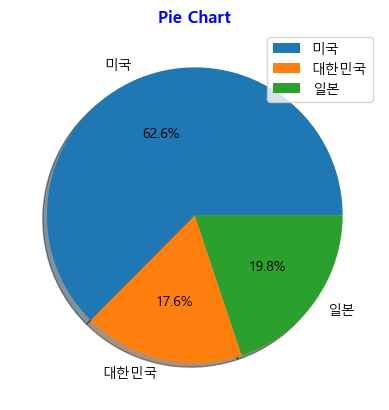

In [27]:
# pie chart의 생성
plt.figure()

plt.pie(grpFrm['cnt'], labels = grpFrm.index,
       shadow = True,
       autopct = '%1.1f%%') #뒤에는 %%를 붙여야한다. 앞에는 %

plt.title('Pie Chart', weight = 'bold', color = 'blue')
plt.legend(loc = 'best')
plt.show()
plt.close()

In [28]:
titanicFrm = sns.load_dataset('titanic')
titanicFrm.info()
display(titanicFrm.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
print('선실별 승객 수의 비율(Pie)을 시각화 한다면 - ')

titanicFrm['pclass'].value_counts().values

선실별 승객 수의 비율(Pie)을 시각화 한다면 - 


array([491, 216, 184], dtype=int64)

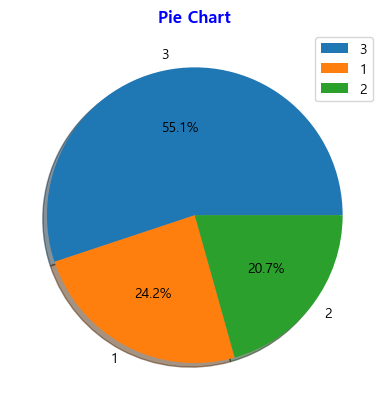

In [48]:
plt.figure()

plt.pie(titanicFrm['pclass'].value_counts().values,
        labels = titanicFrm['pclass'].value_counts().index,
       shadow = True,
       autopct = '%1.1f%%') #뒤에는 %%를 붙여야한다. 앞에는 %

plt.title('Pie Chart', weight = 'bold', color = 'blue')
plt.legend(loc = 'best')
plt.show()
plt.close()

- sns.barplot 비율 표시 

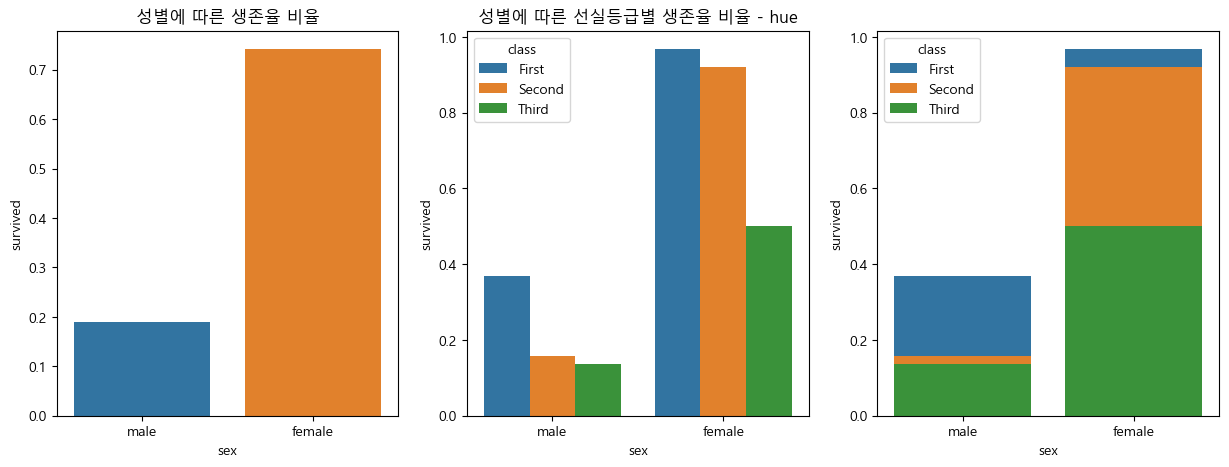

In [70]:
fig = plt.figure(figsize = (15,5))

ax01 = fig.add_subplot(1,3,1)

ax01.set_title('성별에 따른 생존율 비율')
sns.barplot(ax = ax01, data = titanicFrm, x = 'sex' , y = 'survived', ci = None) # 신뢰구간 95% +- 

ax02 = fig.add_subplot(1,3,2)
ax02.set_title('성별에 따른 선실등급별 생존율 비율 - hue')
sns.barplot(ax = ax02, data = titanicFrm,
            x = 'sex' , y = 'survived', ci = None,
            hue = 'class') # hue를 사용하면 그룹화가 가능.

ax03 = fig.add_subplot(1,3,3)
sns.barplot(ax = ax03, data = titanicFrm,
            x = 'sex' , y = 'survived', ci = None,
            hue = 'class',
           dodge = False) # dodge를 사용하면 멀티 바 대신 누적 바를 만들 수 있다.

plt.show()
plt.close()

In [58]:
print('성별에 따른 생존률의 비율 - ')
titanicFrm.groupby('sex')['survived'].mean()

성별에 따른 생존률의 비율 - 


sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [68]:
print('성별에 따른 선실등급별 생존률의 비율 - ')
titanicFrm.groupby(['sex','class'])['survived'].mean()

성별에 따른 선실등급별 생존률의 비율 - 


sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [73]:
tipFrm = sns.load_dataset('tips')
tipFrm.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [86]:
print('요일별 평균 팁, 요일별 매출 평균')
tipFrm.info()
print(tipFrm.groupby('day')['tip'].mean())
tipFrm.groupby('day')['total_bill'].mean()

요일별 평균 팁, 요일별 매출 평균
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64


day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

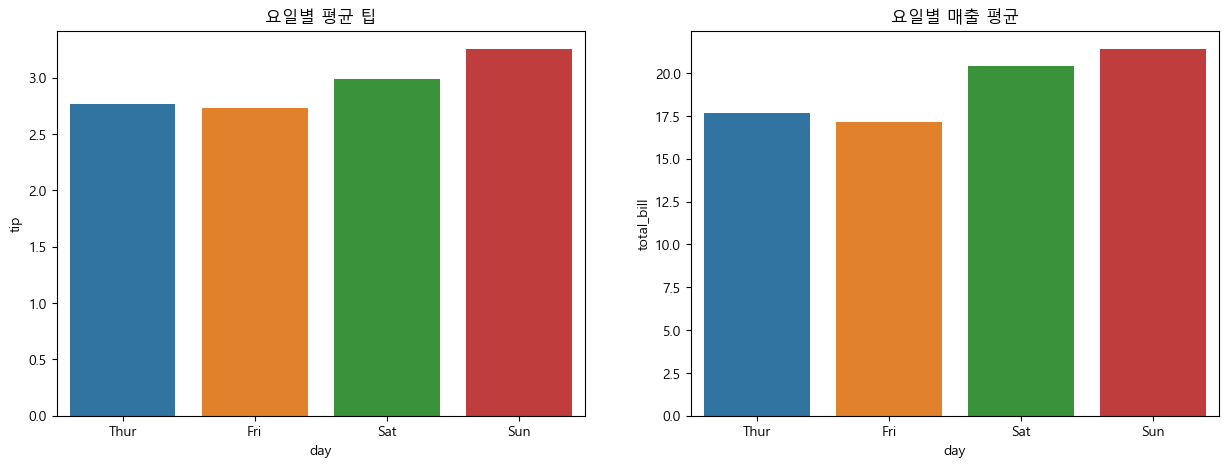

In [87]:
fig = plt.figure(figsize = (15,5))

ax01 = fig.add_subplot(1,2,1)

ax01.set_title('요일별 평균 팁')
sns.barplot(ax = ax01, data = tipFrm, x = 'day' , y = 'tip', ci = None) # x 축에는 범주형, y 축에는 수치형

ax02 = fig.add_subplot(1,2,2)

ax02.set_title('요일별 매출 평균')
sns.barplot(ax = ax02, data = tipFrm,
            x = 'day' , y = 'total_bill', ci = None)


plt.show()
plt.close()

- countplot 빈도수 표시

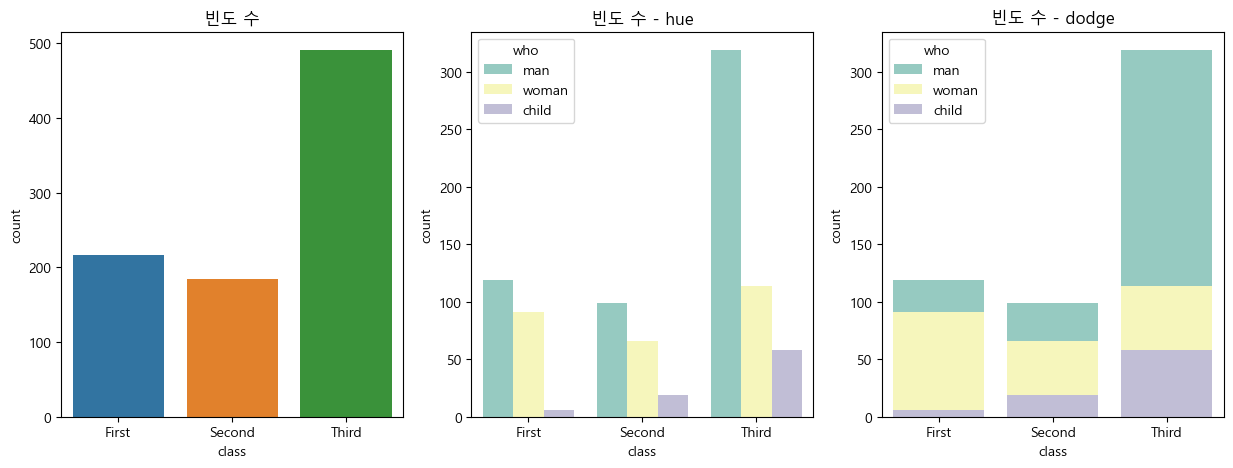

In [111]:
fig = plt.figure(figsize = (15,5))

ax01 = fig.add_subplot(1,3,1)

ax01.set_title('빈도 수')
sns.countplot(ax = ax01, data = titanicFrm, x = 'class') # 신뢰구간 95% +- 

ax02 = fig.add_subplot(1,3,2)
ax02.set_title('빈도 수 - hue')
sns.countplot(ax = ax02, data = titanicFrm,
            x = 'class',
            hue = 'who',
             palette = 'Set3') # hue를 사용하면 그룹화가 가능.

ax03 = fig.add_subplot(1,3,3)
ax03.set_title('빈도 수 - dodge')
sns.countplot(ax = ax03, data = titanicFrm,
            x = 'class',
            hue = 'who',
            palette = 'Set3',
           dodge = False) # dodge를 사용하면 멀티 바 대신 누적 바를 만들 수 있다.


plt.show()
plt.close()

In [99]:
titanicFrm['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [121]:
print('요일별로 팁을 준 빈도를 시각화 - ')
display(tipFrm.head())
tipFrm['day'].value_counts()

요일별로 팁을 준 빈도를 시각화 - 


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

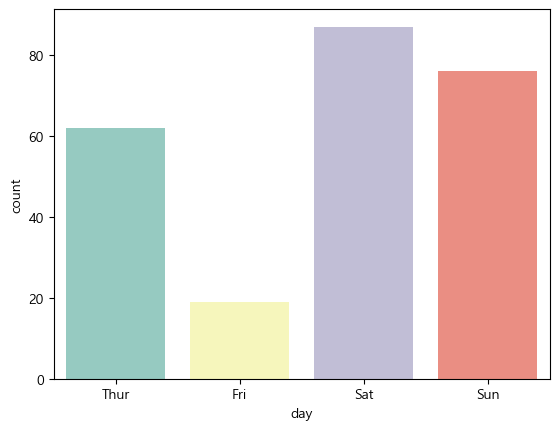

In [122]:
plt.figure()

sns.countplot(data = tipFrm, x= 'day', palette = 'Set3')

plt.show()
plt.close()

- stripplot : 모든 데이터를 점으로 시각화 

요일별로 매출을 시각화 - 


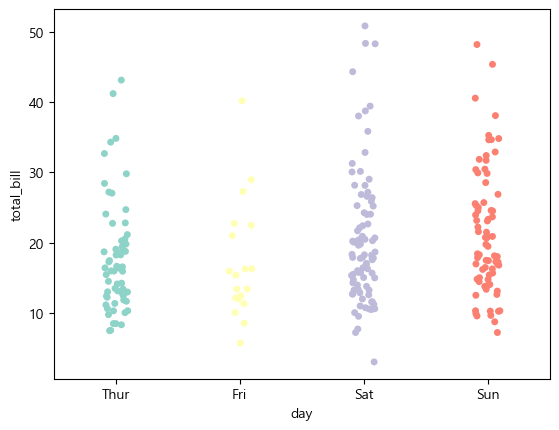

In [124]:
print('요일별로 매출을 시각화 - ')

plt.figure()

sns.stripplot(data = tipFrm, x = 'day', y = 'total_bill' , palette = 'Set3',
             jitter = True) # jitter를 사용하면 overlab되는 데이터가 퍼진다.

plt.show()
plt.close()

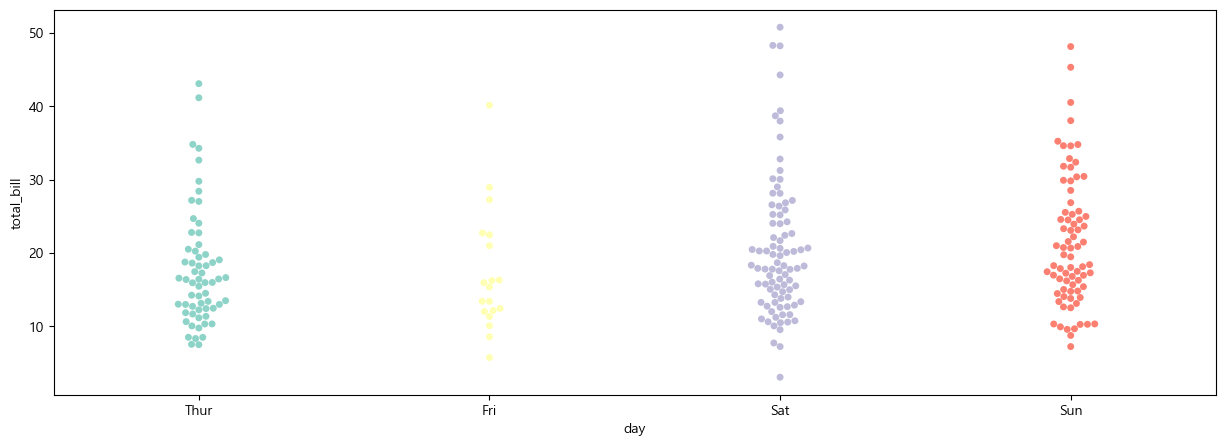

In [127]:
plt.figure(figsize = (15,5))

sns.swarmplot(data = tipFrm, x = 'day', y = 'total_bill' , palette = 'Set3') # jitter를 사용하면 overlab되는 데이터가 퍼진다.

plt.show()
plt.close()

In [ ]:
print('타이타닉을 이용해서 서브플롯으로 2개의 영역을 만들고')
print('class 별 나이분포를 시각화 - strip, swarm')

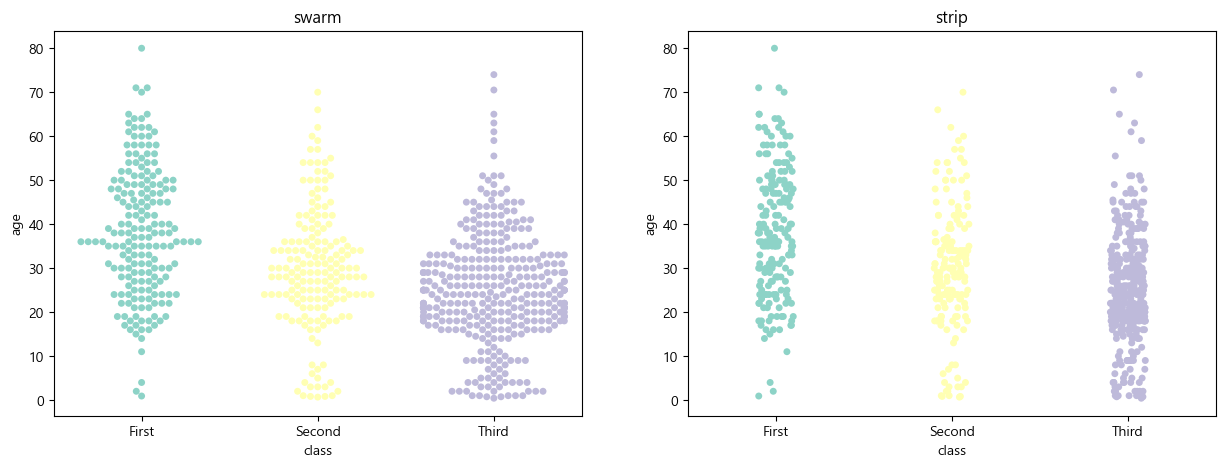

In [129]:
fig = plt.figure(figsize = (15,5))

ax01 = fig.add_subplot(1,2,1)

ax01.set_title('swarm')
sns.swarmplot(ax = ax01, data = titanicFrm, x = 'class', y = 'age', palette = 'Set3') # 신뢰구간 95% +- 

ax02 = fig.add_subplot(1,2,2)
ax02.set_title('strip')
sns.stripplot(ax = ax02, data = titanicFrm,
            x = 'class',
            y = 'age',
             palette = 'Set3') # hue를 사용하면 그룹화가 가능.


plt.show()
plt.close()

- boxplot, violinplot 

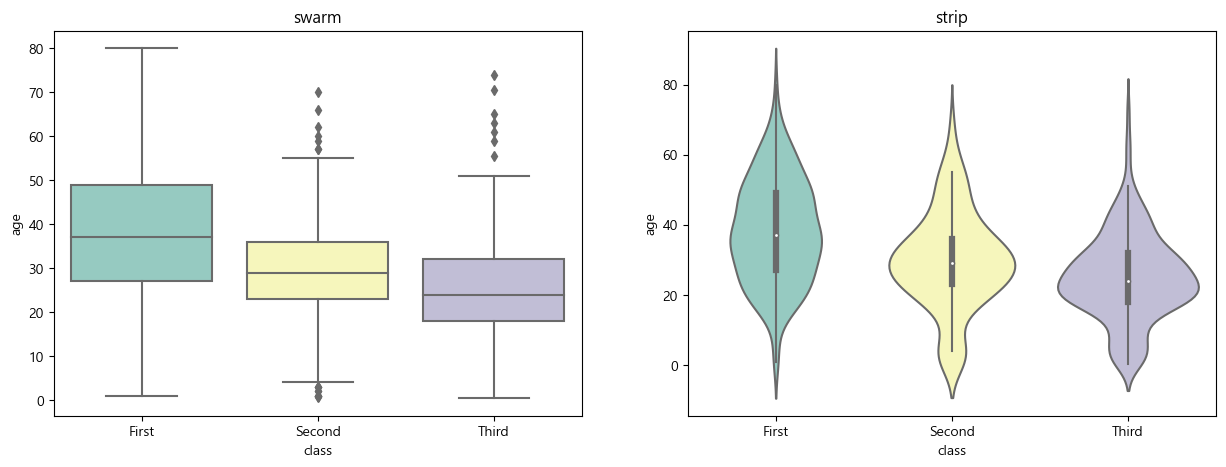

In [130]:
fig = plt.figure(figsize = (15,5))

ax01 = fig.add_subplot(1,2,1)

ax01.set_title('swarm')
sns.boxplot(ax = ax01, data = titanicFrm, x = 'class', y = 'age', palette = 'Set3') # 신뢰구간 95% +- 

ax02 = fig.add_subplot(1,2,2)
ax02.set_title('strip')
sns.violinplot(ax = ax02, data = titanicFrm,
            x = 'class',
            y = 'age',
             palette = 'Set3') # hue를 사용하면 그룹화가 가능.


plt.show()
plt.close()

- heatmap 

In [150]:
titanicFrm.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cnt
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,NaN
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,216.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,184.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,491.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,NaN


In [149]:
print('성별에 따른 선실등급의 인원 수 합을 구한다면 - 피봇')
titanicFrm.groupby('sex')['class'].value_counts()
titanicFrm.pivot(columns = 'sex', values = 'class')

성별에 따른 선실등급의 인원 수 합을 구한다면 - 피봇


sex,female,male
0,NaN,Third
1,First,NaN
2,Third,NaN
3,First,NaN
4,NaN,Third
...,...,...
886,NaN,Second
887,First,NaN
888,Third,NaN
889,NaN,First


In [156]:
titanicFrm['cnt'] = 1
table = titanicFrm.pivot_table(index = 'sex', columns = 'class', values = 'cnt', aggfunc = np.sum)

In [157]:
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


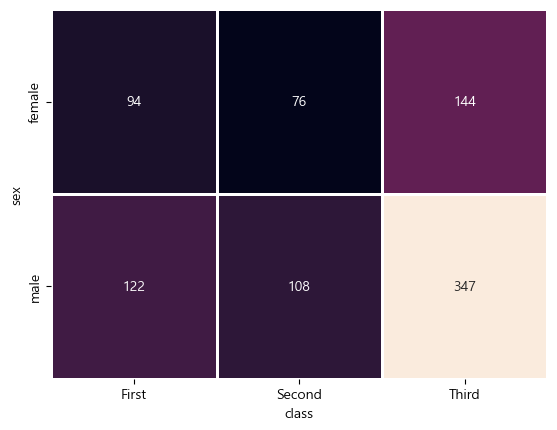

In [169]:
sns.heatmap(table, annot = True, fmt = 'd', linewidth = 1, cbar = False) # cbar를 False로 두면 colorbar가 나오지 않는다. fmt를 d로 두어야 정수로 표현된다.

plt.show()
plt.close()

In [ ]:
flightFrm = sns.load_dataset('flights')
flightFrm.info()
print()
print()
flightFrm.head()

인덱스를 월, 열을 연도로 하는 히트맵을 작성한다면 - 


<Axes: xlabel='year', ylabel='month'>

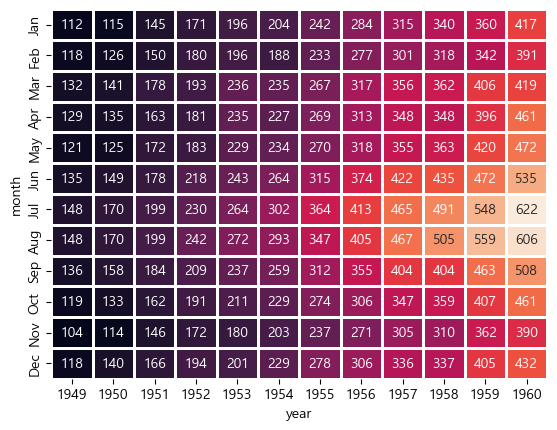

In [184]:
print('인덱스를 월, 열을 연도로 하는 히트맵을 작성한다면 - ')

table = flightFrm.pivot_table(index = 'month',columns = 'year',values = 'passengers')
sns.heatmap(table, annot = True, fmt = 'd', linewidth = 1, cbar = False)

pairplot() : 상관관계를 시각화하는 함수
- 상관분석 : 두 확률변수간의 관계를 지수로 표현하는 것
- 상관계수(관련성의 정도) : -1 ~ 1 

In [188]:
irisFrm = sns.load_dataset('iris')
irisFrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


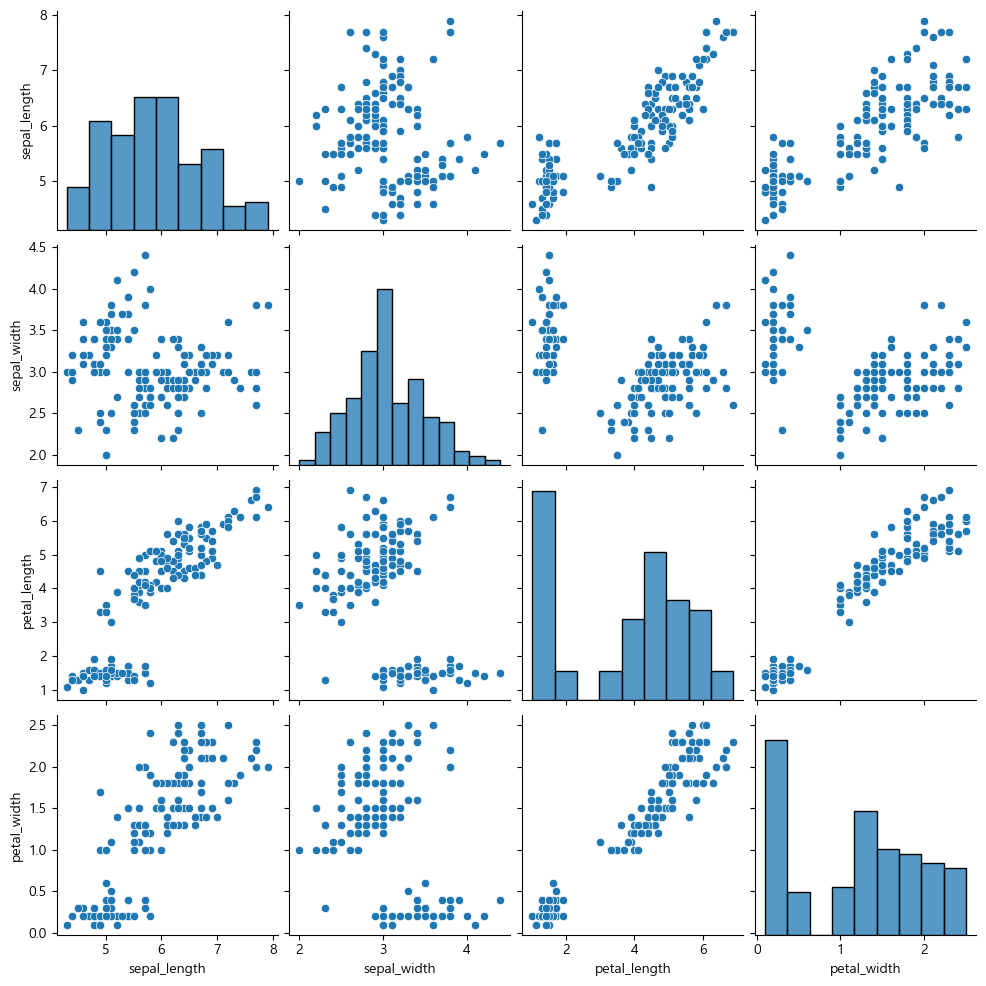

In [190]:
sns.pairplot(irisFrm)

plt.show()
plt.close()

- 지도 시각화

In [192]:
import folium as g

In [203]:
map = g.Map(location = [35.15681996391764, 129.11678564557383],
     zoom_start = 15)
g.Marker([35.15681996391764, 129.11678564557383],
        popup = '동아대학교').add_to(map)
g.CircleMarker([35.15681996391764, 129.11678564557383],
              radius = 50,
              color = 'skyblue').add_to(map)
map

In [208]:
seoulUniv = pd.read_excel('./data/서울지역 대학교 위치.xlsx', index_col = 0)
seoulUniv.info()
seoulUniv.head()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, KAIST 서울캠퍼스  to 홍익대학교
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   위도      47 non-null     float64
 1   경도      47 non-null     float64
dtypes: float64(2)
memory usage: 1.1+ KB


,위도,경도
KAIST 서울캠퍼스,37.592573,127.046737
KC대학교,37.548345,126.854797
가톨릭대학교(성신교정),37.585922,127.004328
가톨릭대학교(성의교정),37.499623,127.006065
감리교신학대학교,37.567645,126.961610


In [225]:
map = g.Map(location = [35.17947541523006, 126.97866359843825],
     zoom_start = 12)

for name in seoulUniv.index:
    # print(name)
    lat = seoulUniv.loc[name,'위도']
    lng = seoulUniv.loc[name,'경도']
    # print(lat, lng)
    g.Marker([lat, lng],
            popup = name,
            icon = g.Icon(color = 'blue')).add_to(map)

    g.CircleMarker([lat, lng],
              radius = 30,
              color = 'skyblue',
                fill_color = 'red').add_to(map)
map

In [235]:
schoolFrm = pd.read_excel('./data/elem_school_folium.xlsx')
schoolFrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11873 entries, 0 to 11872
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   학교ID      11873 non-null  object 
 1   학교명       11873 non-null  object 
 2   학교급구분     11873 non-null  object 
 3   설립일자      11873 non-null  object 
 4   설립형태      11873 non-null  object 
 5   본교분교구분    11873 non-null  object 
 6   운영상태      11873 non-null  object 
 7   소재지지번주소   11873 non-null  object 
 8   소재지도로명주소  11872 non-null  object 
 9   시도교육청코드   11873 non-null  int64  
 10  시도교육청명    11873 non-null  object 
 11  교육지원청코드   11873 non-null  int64  
 12  교육지원청명    11873 non-null  object 
 13  생성일자      11873 non-null  object 
 14  변경일자      11873 non-null  object 
 15  위도        11873 non-null  float64
 16  경도        11873 non-null  float64
 17  데이터기준일자   11873 non-null  object 
 18  제공기관코드    11873 non-null  int64  
 19  제공기관명     11873 non-null  object 
dtypes: float64(2), int64(3), obj

In [237]:
# schoolFrm.isnull().sum()

In [247]:
schoolFrm.columns
print('소재지')

소재지


In [240]:
schoolFrm['시도교육청명'].unique()

array(['서울특별시교육청', '부산광역시교육청', '대구광역시교육청', '인천광역시교육청', '광주광역시교육청',
       '대전광역시교육청', '울산광역시교육청', '경기도교육청', '강원도교육청', '충청북도교육청', '충청남도교육청',
       '세종특별자치시교육청', '전라북도교육청', '전라남도교육청', '경상북도교육청', '경상남도교육청',
       '제주특별자치도교육청'], dtype=object)

In [303]:
print('소재지가 부산지역의 초등학교를 시각화 - ')
schoolFrm['소재지도로명주소'].str.startswith('부산') # str.을 붙이면 시리즈의 열에도 str의 함수를 사용할 수 있게 된다.
print('학교명, 학교급구분, 소재지도로명주소, 위도, 경도 - subset')
subsetFrm = schoolFrm[['학교명', '학교급구분', '소재지도로명주소', '위도', '경도']]
print('소재지가 부산지역의 초등학교만 추출 - 결측값확인(제거) ')
subsetFrm = subsetFrm.dropna()
busanFrm = subsetFrm[(subsetFrm['소재지도로명주소'].str.startswith('부산광역시 서구')) & (subsetFrm['학교급구분'] == '초등학교')] 
print('학교명을 인덱스로 만들어서 지도로 시각화 - ')
busanFrm.set_index('학교명',inplace = True)
busanFrm

소재지가 부산지역의 초등학교를 시각화 - 
학교명, 학교급구분, 소재지도로명주소, 위도, 경도 - subset
소재지가 부산지역의 초등학교만 추출 - 결측값확인(제거) 
학교명을 인덱스로 만들어서 지도로 시각화 - 


,학교급구분,소재지도로명주소,위도,경도
학교명,,,,
토성초등학교,초등학교,부산광역시 서구 구덕로134번길 45,35.098643,129.021351
부민초등학교,초등학교,부산광역시 서구 고운들로 12,35.105970,129.019922
화랑초등학교,초등학교,부산광역시 서구 대영로86번길 56,35.108571,129.021064
남부민초등학교,초등학교,부산광역시 서구 천마로 153,35.089418,129.023334
동신초등학교,초등학교,부산광역시 서구 대영로85번길 81-19,35.113860,129.017590
구덕초등학교,초등학교,부산광역시 서구 보수대로 312,35.120415,129.012541
대신초등학교,초등학교,부산광역시 서구 대신로 63,35.116181,129.011782
아미초등학교,초등학교,부산광역시 서구 해돋이로 241,35.098738,129.016068
송도초등학교,초등학교,부산광역시 서구 충무대로 25,35.078240,129.015594


In [302]:
map = g.Map(location = [35.17947541523006, 129.07511055960526],
     zoom_start = 12)

for name in busanFrm.index:
    # print(name)
    lat = busanFrm.loc[name,'위도']
    lng = busanFrm.loc[name,'경도']
    # print(lat, lng)
    g.Marker([lat, lng],
            popup = name,
            icon = g.Icon(color = 'blue')).add_to(map)

    g.CircleMarker([lat, lng],
              radius = 30,
              color = 'skyblue',
                fill_color = 'red').add_to(map)

map

In [304]:
print('소재지가 부산지역의 초등학교를 시각화 - ')
schoolFrm['소재지도로명주소'].str.startswith('부산') # str.을 붙이면 시리즈의 열에도 str의 함수를 사용할 수 있게 된다.
print('학교명, 학교급구분, 소재지도로명주소, 위도, 경도 - subset')
subsetFrm = schoolFrm[['학교명', '학교급구분', '소재지도로명주소', '위도', '경도']]
print('소재지가 부산지역의 초등학교만 추출 - 결측값확인(제거) ')
subsetFrm = subsetFrm.dropna()
busanFrm = subsetFrm[(subsetFrm['소재지도로명주소'].str.startswith('부산')) 
                     & (subsetFrm['학교급구분'] == '초등학교')] # str.contains('서구')
print('학교명을 인덱스로 만들어서 지도로 시각화 - ')
busanFrm.set_index('학교명',inplace = True)
busanFrm

소재지가 부산지역의 초등학교를 시각화 - 
학교명, 학교급구분, 소재지도로명주소, 위도, 경도 - subset
소재지가 부산지역의 초등학교만 추출 - 결측값확인(제거) 
학교명을 인덱스로 만들어서 지도로 시각화 - 


,학교급구분,소재지도로명주소,위도,경도
학교명,,,,
광일초등학교,초등학교,부산광역시 중구 중구로 74,35.103725,129.029845
보수초등학교,초등학교,부산광역시 중구 흑교로 74,35.106070,129.024219
봉래초등학교,초등학교,부산광역시 중구 대영로226번길 15,35.111481,129.036125
남성초등학교,초등학교,부산광역시 중구 샘길 14,35.104111,129.032386
토성초등학교,초등학교,부산광역시 서구 구덕로134번길 45,35.098643,129.021351
...,...,...,...,...
모전초등학교,초등학교,부산광역시 기장군 정관읍 정관1로 17,35.339685,129.162336
명일초등학교,초등학교,부산광역시 강서구 명지국제5로 170-5,35.109470,128.922354
명지초등학교,초등학교,부산광역시 강서구 명지국제6로 296,35.102259,128.924143


In [307]:
map = g.Map(location = [35.17947541523006, 129.07511055960526],
     zoom_start = 12)

for name in busanFrm.index:
    # print(name)
    lat = busanFrm.loc[name,'위도']
    lng = busanFrm.loc[name,'경도']
    # print(lat, lng)
    try:
        g.Marker([lat, lng],
            popup = name,
            icon = g.Icon(color = 'blue')).add_to(map)
    except Exception as e:
            
            print('에러가 발생했습니다')
map

에러가 발생했습니다
에러가 발생했습니다


,학교명,학교급구분,소재지도로명주소,위도,경도
584,광일초등학교,초등학교,부산광역시 중구 중구로 74,35.103725,129.029845
585,보수초등학교,초등학교,부산광역시 중구 흑교로 74,35.106070,129.024219
586,봉래초등학교,초등학교,부산광역시 중구 대영로226번길 15,35.111481,129.036125
587,남성초등학교,초등학교,부산광역시 중구 샘길 14,35.104111,129.032386
588,토성초등학교,초등학교,부산광역시 서구 구덕로134번길 45,35.098643,129.021351
...,...,...,...,...,...
11570,모전초등학교,초등학교,부산광역시 기장군 정관읍 정관1로 17,35.339685,129.162336
11635,명일초등학교,초등학교,부산광역시 강서구 명지국제5로 170-5,35.109470,128.922354
11636,명지초등학교,초등학교,부산광역시 강서구 명지국제6로 296,35.102259,128.924143
11637,신명초등학교,초등학교,부산광역시 강서구 명지국제7로 178,35.095233,128.920716
